In [1]:
import os
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt

In [2]:
# set overall data path1
datapath1 = "/work2/hulk/work/jeff/openawsem_test/Fragment_mem_refine/fibril_monomer/CF_tool/run/CF_61ch_M_FM_all_1000/"
trj_file1 = [os.path.join(datapath1, f'CF_61ch_M_FM_all_1000_0{i}/run_03/movie.dcd') for i in range(0, 5)]
pdb_file1 = os.path.join(datapath1, 'CF_61ch_M_FM_all_1000_00/run_00/native.pdb')

In [3]:
# set overall data path2
datapath2 = "/work2/hulk/work/jeff/openawsem_test/Fragment_mem_refine/fibril_monomer/CF_tool/run/CF_61ch_M_FM_all_1000_2/"
trj_file2 = [os.path.join(datapath2, f'CF_61ch_M_FM_all_1000_2_0{i}/run_01/movie.dcd') for i in range(0, 5)]
pdb_file2 = os.path.join(datapath2, f'CF_61ch_M_FM_all_1000_2_00/run_00/native.pdb')

In [4]:
# Load trajectories of data path1
traj_CF_straight_o_00 = md.load(trj_file1[0], top = pdb_file1, stride=1000)
traj_CF_straight_o_01 = md.load(trj_file1[1], top = pdb_file1, stride=1000)
traj_CF_straight_o_02 = md.load(trj_file1[2], top = pdb_file1, stride=1000)
traj_CF_straight_o_03 = md.load(trj_file1[3], top = pdb_file1, stride=1000)
traj_CF_straight_o_04 = md.load(trj_file1[4], top = pdb_file1, stride=1000)

In [5]:
# Load trajectories of data path2
traj_CF_straight_n_00 = md.load(trj_file2[0], top = pdb_file2, stride=1000)
traj_CF_straight_n_01 = md.load(trj_file2[1], top = pdb_file2, stride=1000)
traj_CF_straight_n_02 = md.load(trj_file2[2], top = pdb_file2, stride=1000)
traj_CF_straight_n_03 = md.load(trj_file2[3], top = pdb_file2, stride=1000)
traj_CF_straight_n_04 = md.load(trj_file2[4], top = pdb_file2, stride=1000)

In [6]:
def calculate_main_axis(traj):
        topology = traj.topology
        
        # Calculate main axis for chains 0 and 60
        chain_positions = []
        
        chain_indice1 = topology.select('chainid 0 and residue 24 to 25 and name CA')
        
        chain_positions.append(traj.xyz[:, chain_indice1, :])
        
        chain_indice2 = topology.select('chainid 60 and residue 24 to 25 and name CA')
        
        chain_positions.append(traj.xyz[:, chain_indice2, :])
        
        #number_of_chain_positions = len(chain_positions)
        
        #print(number_of_chain_positions)
        #print(chain_positions)
        
        center1 = np.mean(chain_positions[0], axis=1)
        center2 = np.mean(chain_positions[1], axis=1)
        
        main_axis = center2 - center1
        
        #print("main_axis:", main_axis)
        
        #num_main = len(main_axis)
        
        #print("num_main", num_main)
        
        norms = np.linalg.norm(main_axis, axis=1)[:, np.newaxis]
        normalized_main_axis = main_axis / norms
        
        return normalized_main_axis

In [8]:
def calculate_z_vector(traj):
        topology = traj.topology
    
        ca_positions = []
        
        ca_indice1 = topology.select('chainid 61 and residue 8 and name CA')
        
        ca_positions.append(traj.xyz[:, ca_indice1, :])
        
        ca_indice2 = topology.select('chainid 61 and residue 13 and name CA')
        
        ca_positions.append(traj.xyz[:, ca_indice2, :])
        
        #print(ca_positions)
        
        z_vector = ca_positions[0] - ca_positions[1]
        
        #print("z_vector:", z_vector)
        
        #num_z = len(z_vector)
        
        #print("num_z", num_z)
        
        norms = np.linalg.norm(z_vector, axis=2)[:, :, np.newaxis]
        normalized_z_vector = z_vector / norms
        
        return normalized_z_vector

In [10]:
def calculate_p2(traj_file):
    main_axis = calculate_main_axis(traj_file)
    z_vector = calculate_z_vector(traj_file)
    z_vector = z_vector.reshape((z_vector.shape[0], z_vector.shape[2]))
    cos_theta = np.sum(main_axis * z_vector, axis=1)
    p2 = 0.5 * (3 * cos_theta**2 - 1)
    
    return p2

In [11]:
#Calculate P2 values
p2_values_o = [calculate_p2(traj_CF_straight_o_00), 
               calculate_p2(traj_CF_straight_o_01), 
               calculate_p2(traj_CF_straight_o_02), 
               calculate_p2(traj_CF_straight_o_03), 
               calculate_p2(traj_CF_straight_o_04)]

p2_values_n = [calculate_p2(traj_CF_straight_n_00), 
               calculate_p2(traj_CF_straight_n_01), 
               calculate_p2(traj_CF_straight_n_02), 
               calculate_p2(traj_CF_straight_n_03), 
               calculate_p2(traj_CF_straight_n_04)]

# Calculate P2 values
#p2_values_o = [calculate_p2(traj_CF_straight_o_00[:101]), 
#               calculate_p2(traj_CF_straight_o_01[:101]), 
#               calculate_p2(traj_CF_straight_o_02[:101]), 
#               calculate_p2(traj_CF_straight_o_03[:101]), 
#               calculate_p2(traj_CF_straight_o_04[:101])]

#p2_values_n = [calculate_p2(traj_CF_straight_n_00[:101]), 
#               calculate_p2(traj_CF_straight_n_01[:101]), 
#               calculate_p2(traj_CF_straight_n_02[:101]), 
#               calculate_p2(traj_CF_straight_n_03[:101]), 
#               calculate_p2(traj_CF_straight_n_04[:101])]

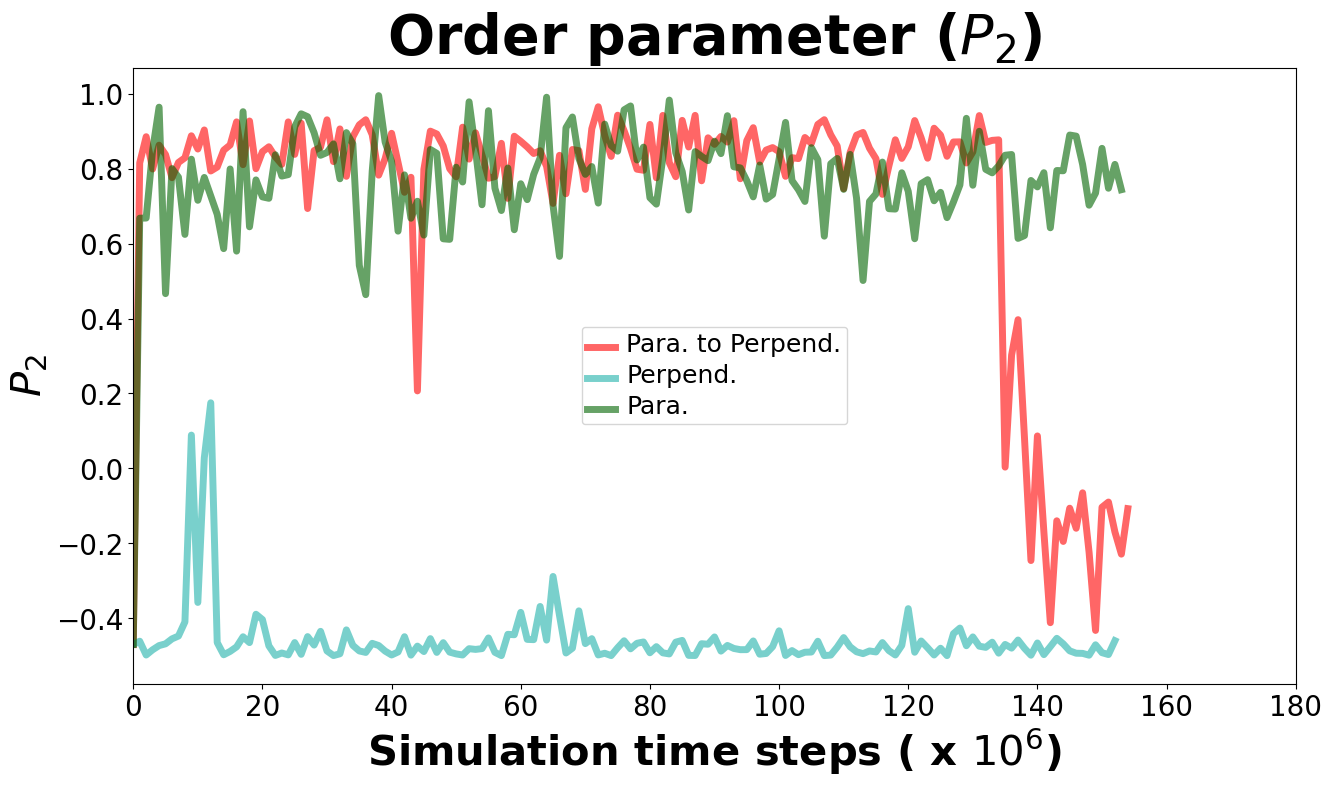

In [15]:
plt.figure(figsize=(15,8))
plt.title(r'Order parameter ($P_2$)', fontsize=40, fontweight='bold')

# 生成 0 到 100 的時間步
#time_steps = np.arange(101)

plt.plot(p2_values_o[0], linewidth=5, label=r'Para. to Perpend.', markersize=18, alpha=0.6, color='red')
plt.plot(p2_values_o[1], linewidth=5, label=r'Perpend.', markersize=18, alpha=0.6, color='lightseagreen')
#plt.plot(p2_values_o[2], linewidth=5, label=r'traj_02', markersize=18, alpha=0.6, color='hotpink')
plt.plot(p2_values_o[3], linewidth=5, label=r'Para.', markersize=18, alpha=0.6, color='darkgreen')
#plt.plot(p2_values_o[4], linewidth=5, label=r'traj_04', markersize=18, alpha=0.6, color='skyblue')
#plt.plot(p2_values_n[0], linewidth=5, label=r'traj_05', markersize=18, alpha=0.6, color='yellowgreen')
#plt.plot(p2_values_n[1], linewidth=5, label=r'traj_06', markersize=18, alpha=0.6, color='chocolate')
#plt.plot(p2_values_n[2], linewidth=5, label=r'traj_07', markersize=18, alpha=0.6, color='orange')
#plt.plot(p2_values_n[3], linewidth=5, label=r'traj_08', markersize=18, alpha=0.6, color='blue')
#plt.plot(p2_values_n[4], linewidth=5, label=r'traj_09', markersize=18, alpha=0.6, color='mediumpurple')


plt.xlabel(r"Simulation time steps ( x $10^{6}$)", fontsize=30, fontweight='bold')
#plt.xlabel(r"Frame", fontsize=25)
plt.xticks(fontsize=20, rotation=0)
plt.ylabel(r"$P_2$", fontsize=30, fontweight='bold')
plt.yticks(fontsize=20)
plt.xlim([0, 180])  # 設定 x 軸範圍

leg = plt.legend()
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()
plt.setp(leg_lines, linewidth=5)
plt.setp(leg_texts, fontsize=18)

plt.show()